# Emerging Topics final code - Coronavirus

This code was created from Martha and Sean's emerging topic code and was used to create the hottest/coldest topics static graphics for the full, pandemics, and coronavirus corpora.

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import gensim
import time

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression as lm

import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D

import seaborn as sns

### Data Ingestion

In [2]:
# full corpus
#df = pd.read_pickle("../../data/final/final_dataset_7-20.pkl")
df = pd.read_pickle("/home/zz3hs/git/dspg21RnD/data/dspg21RnD/smaller-final-dataset.pkl")
# pandemic corpus
#df = pd.read_pickle("/home/kjl5t/dspg20RnD/data/final/dashboard_data/pandemic_corpus.pkl")
#df.reset_index(inplace=True)

# coronavirus corpus
#df = pd.read_pickle("/home/kjl5t/dspg20RnD/data/final/dashboard_data/corona_corpus.pkl")
df.reset_index(inplace=True)

In [3]:
df.head()

index  original index PROJECT_ID  \
0      0           17608     152242   
1      1          111864     190316   
2      2           22052     154213   
3      3           35004     159362   
4      4          371628     594482   

                                            ABSTRACT    FY  ORG_COUNT  \
0  The multiprotein complex y-secretase proteolyt...  2008          1   
1  DESCRIPTION (provided by applicant):   The Kis...  2008          1   
2  DESCRIPTION (provided by applicant): The objec...  2008          1   
3  Obesity is the cause of many adverse pregnancy...  2008          1   
4  Local potato advisory groups have expressed in...  2010          1   

   PI_COUNT  nchar                               final_frqwds_removed  \
0         1   1402  [multiprotein, y_secretase, proteolytically_cl...   
1         1   2553  [kissl, gene, encode, peptide, kisspeptin, bin...   
2         1   1414  [biophysical, basis, thermodynamics_kinetic, m...   
3         1   1545  [obesity, adverse_pregnancyoutcome, great, hea...   
4         1    271  [local, potato, advisory, express, interest, m...   

                                       PROJECT_TERMS  ... ORGANIZATION_CITY  \
0   Active Sites; Affect; Alzheimer's Disease; Am...  ...            BOSTON   
1   Affect; Animal Model; Axon; Behavior; Behavio...  ...           SEATTLE   
2   Agreement; Antibodies; base; Binding; Biochem...  ...         CAMBRIDGE   
3   African; Analysis of Variance; Asians; Birth;...  ...           HOUSTON   
4   cost; Health; interest; Manure; Parasitic nem...  ...         CORVALLIS   

  ORGANIZATION_STATE ORGANIZATION_ZIP ORGANIZATION_COUNTRY BUDGET_START_DATE  \
0                 MA        021156110        UNITED STATES         12/1/2007   
1                 WA        981959472        UNITED STATES          9/1/2008   
2                 MA        021385319        UNITED STATES          1/2/2008   
3                 TX        770305400        UNITED STATES          4/1/2008   
4                 OR            97331        UNITED STATES               NaN   

  BUDGET_END_DATE CFDA_CODE  FY.y FY_TOTAL_COST FY_TOTAL_COST_SUB_PROJECTS  
0        1/1/2008    93.866  2008        3483.0                        NaN  
1        1/1/2009    93.865  2008       39175.0                        NaN  
2        1/1/2009    93.859  2008       49646.0                        NaN  
3        1/1/2009    93.361  2008       20406.0                        NaN  
4             NaN    10.203  2010           NaN                        NaN  

[5 rows x 32 columns]

In [12]:
df = df.loc[1:1000,:]
df

index  original index PROJECT_ID  \
1         1          111864     190316   
2         2           22052     154213   
3         3           35004     159362   
4         4          371628     594482   
5         5          233317     264035   
...     ...             ...        ...   
996     996          307568     150675   
997     997          547966     475527   
998     998          487238      53400   
999     999          487225      53387   
1000   1000          487224      53386   

                                               ABSTRACT    FY  ORG_COUNT  \
1     DESCRIPTION (provided by applicant):   The Kis...  2008          1   
2     DESCRIPTION (provided by applicant): The objec...  2008          1   
3     Obesity is the cause of many adverse pregnancy...  2008          1   
4     Local potato advisory groups have expressed in...  2010          1   
5     DESCRIPTION (provided by applicant): Despite a...  2009          1   
...                                                 ...   ...        ...   
996   DESCRIPTION (provided by applicant):   This is...  2010          1   
997   DURING THE CRYOGENIC PHASE OF THE SUCCESSFUL S...  2013          1   
998   ECLIPSING BINARIES (EBS) ARE KEY LABORATORIES ...  2012          1   
999   WE PROPOSE TO IMPROVE THE ANGULAR RESOLUTION O...  2012          1   
1000  STAR FORMATION REGULATION IN GALAXIES: INSIGHT...  2012          1   

      PI_COUNT  nchar                               final_frqwds_removed  \
1            1   2553  [kissl, gene, encode, peptide, kisspeptin, bin...   
2            1   1414  [biophysical, basis, thermodynamics_kinetic, m...   
3            1   1545  [obesity, adverse_pregnancyoutcome, great, hea...   
4            1    271  [local, potato, advisory, express, interest, m...   
5            1   2573  [advance, tooth, morphogenesis, differentiatio...   
...        ...    ...                                                ...   
996          1   1363  [revise, fund, renovation, 2nd_3rd, floors, ba...   
997          1   2129  [cryogenic, successful, spitzer, mission, infr...   
998          1    254  [eclipse, binarie, ebs, laboratory, fundamenta...   
999          1    255  [angular_resolution, widely, map, galactic, du...   
1000         1    255  [star, formation, regulation, galax, insight, ...   

                                          PROJECT_TERMS  ...  \
1      Affect; Animal Model; Axon; Behavior; Behavio...  ...   
2      Agreement; Antibodies; base; Binding; Biochem...  ...   
3      African; Analysis of Variance; Asians; Birth;...  ...   
4      cost; Health; interest; Manure; Parasitic nem...  ...   
5      Adenovirus Vector; Adenoviruses; Adult; base;...  ...   
...                                                 ...  ...   
996    Extramural Activities; programs; research fac...  ...   
997    Achievement; Atlases; cryogenics; Databases; ...  ...   
998         Evolution; Laboratories; Modeling; Property  ...   
999    Atlases; Data; Dust; improved; Maps; Resoluti...  ...   
1000             Databases; Galaxy; insight; Regulation  ...   

     ORGANIZATION_STATE ORGANIZATION_ZIP ORGANIZATION_COUNTRY  \
1                    WA        981959472        UNITED STATES   
2                    MA        021385319        UNITED STATES   
3                    TX        770305400        UNITED STATES   
4                    OR            97331        UNITED STATES   
5                    MA        021156110        UNITED STATES   
...                 ...              ...                  ...   
996                  SC        294035120        UNITED STATES   
997                  NY       14850-2820        UNITED STATES   
998                  TN       37203-2416        UNITED STATES   
999                  MA       02138-3846        UNITED STATES   
1000                 IN       47405-1106        UNITED STATES   

     BUDGET_START_DATE BUDGET_END_DATE CFDA_CODE  FY.y FY_TOTAL_COST  \
1             9/1/2008        1/1/2009    93.865  200

In [13]:
# input needed for LDA, NMF (all from Scikit-Learn) is one string per document (not a list of strings)

text = []
docs = df["final_frqwds_removed"]

for abstract in docs:
    text.append(" ".join(abstract))

### Functions needed for all models

In [14]:
# function slightly modified from https://nlpforhackers.io/topic-modeling/

def print_topics(topic_term_mat, vectorizer, top_n=10):
    for idx, topic in enumerate(topic_term_mat):  # loop through each row of H.  idx = row index.  topic = actual row
        print("\nTopic %d:" % (idx))
        #print([(vectorizer.get_feature_names()[i], topic[i])  # printing out words corresponding to indices found in next line
                        #for i in topic.argsort()[:-top_n - 1:-1]])  # finding indices of top words in topic
            
        print_list = [(vectorizer.get_feature_names()[i], topic[i])  
                        for i in topic.argsort()[:-top_n - 1:-1]]
        for item in print_list:
            print(item)
        

In [15]:
# Function to format topics as a "list of list of strings".
# Needed for topic coherence function in Gensim

# function modified from https://nlpforhackers.io/topic-modeling/

def str_topics(topic_term_mat, vectorizer, top_n=10):

    #input. top_n: how many words to list per topic.  If -1, then list all words.
       
    topic_words = []
    
    for idx, topic in enumerate(topic_term_mat):  # loop through each row of H.  idx = row index.  topic = actual row
            
        if top_n == -1:   
            topic_words.append([vectorizer.get_feature_names()[i] for i in topic.argsort()[::-1]])
        else:
            topic_words.append([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-top_n - 1:-1]])
    
    str_wds = []
    
    for wds in topic_words:
        str_wds.append(", ".join(wds))    
    
    return str_wds 

## NMF
- Optimal Model: full dataset, 75 topics, random_state = 14
- Pandemic Model: pandemic dataset, 30, random_state = 1
- Coronavirus Model: coronavirus dataset, 30, random_state = 1

In [16]:
# use for full dataset
#tfidf_vectorizer = TfidfVectorizer(max_df=0.6, min_df=20, lowercase=False, max_features=int(len(docs)/2))
#tf_idf = tfidf_vectorizer.fit_transform(text)

# use for pandemic or coronavirus dataset
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=3, lowercase=False)
tf_idf = tfidf_vectorizer.fit_transform(text)


In [17]:
# create model

num_topics = 30 

t1 = time.time()
nmf_model = NMF(n_components=num_topics, random_state = 1)
doc_topic = nmf_model.fit_transform(tf_idf)
t2 = time.time()
print(f"  Model time: {t2-t1}")

topic_term = nmf_model.components_

  Model time: 2.419065475463867


/home/zz3hs/.conda/envs/crystal_bert/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [18]:
#print_topics(nmf_model, tfidf_vectorizer, 10)

### Emerging Topics

In [19]:
# Extract Year from PROJECT_START_DATE

#On our graphs, we want to be able to show year. Therefore, this getYear function gets the year from different date formats from Project Start Year/End Year

#START

def getYear(a):   
    a = str(a)
    if a.find("/"):
        splitdate = a.split("/")
        if len(splitdate) == 3:
            a = splitdate[2]
        else:
            a = splitdate[0]
    year = str(a)
    return year

df['START_YEAR'] = df['PROJECT_START_DATE'].apply(getYear)

In [21]:
#Pulls sample data subsetted by year then takes mean theta for each abstract

topic_frame = pd.DataFrame(doc_topic, columns=["Topic"+" "+str(i) for i in range(num_topics)])
topic_frame["START_YEAR"] = df["START_YEAR"]


In [22]:
topic_frame

Topic 0   Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6  \
0    0.008791  0.000000  0.000000  0.000000  0.000972  0.000000  0.000466   
1    0.000000  0.000000  0.000000  0.000000  0.029141  0.000000  0.035414   
2    0.000992  0.000000  0.000000  0.009728  0.000000  0.000000  0.000000   
3    0.000000  0.070089  0.000000  0.000000  0.003290  0.000000  0.000000   
4    0.007070  0.000000  0.000000  0.000318  0.000000  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.000080  0.020372  0.001124  0.026708  0.032209  0.000000  0.000000   
996  0.000000  0.009535  0.005724  0.000000  0.000000  0.003013  0.000052   
997  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
998  0.001223  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
999  0.000000  0.000000  0.000000  0.000000  0.007010  0.000000  0.002376   

      Topic 7   Topic 8   Topic 9  ...  Topic 21  Topic 22  Topic 23  \
0    0.000000  0.000000  0.000000  ...  0.013718  0.000000  0.000000   
1    0.000000  0.005791  0.000508  ...  0.076717  0.000000  0.000000   
2    0.000000  0.000000  0.000000  ...  0.001936  0.000000  0.000000   
3    0.003101  0.039534  0.000000  ...  0.000000  0.000000  0.000000   
4    0.006618  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
995  0.000000  0.009516  0.000000  ...  0.002835  0.009282  0.000000   
996  0.000000  0.019991  0.013815  ...  0.003399  0.011487  0.000000   
997  0.002440  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
998  0.000000  0.000000  0.022170  ...  0.006642  0.026526  0.000778   
999  0.000000  0.000000  0.000000  ...  0.004979  0.000000  0.000000   

     Topic 24  Topic 25  Topic 26  Topic 27  Topic 28  Topic 29  START_YEAR  
0    0.000000  0.002347  0.000000  0.000000  0.000000  0.000000         NaN  
1    0.018635  0.001625  0.000000  0.055213  0.000000  0.000000        2007  
2    0.000000  0.000000  0.059859  0.000000  0.000000  0.027413        2007  
3    0.000000  0.000000  0.000000  0.023156  0.000000  0.000000        2006  
4    0.000000  0.673669  0.000000  0.000000  0.000000  0.000000        2009  
..        ...       ...       ...       ...       ...       ...         ...  
995  0.030215  0.000000  0.029505  0.000000  0.005840  0.000000        2013  
996  0.020913  0.001903  0.000000  0.020294  0.000000  0.192410        2010  
997  0.004974  0.000000  0.000000  0.000000  0.000000  0.000000        2013  
998  0.000000  0.000000  0.000000  0.000000  0.000000  0.039993        2012  
999  0.000000  0.005020  0.000000  0.003319  0.001351  0.084854        2012  

[1000 rows x 31 columns]

In [23]:
topic_frame_se = topic_frame.groupby("START_YEAR").sem().reset_index()
topic_frame_se = topic_frame_se.sort_values(by = "START_YEAR")
topic_frame_se["START_YEAR"] = topic_frame_se["START_YEAR"].astype(int)

topic_wts_se_2010_2019 = topic_frame_se[topic_frame_se["START_YEAR"] > 2009] 
topic_wts_se_2010_2019 = topic_wts_se_2010_2019[topic_wts_se_2010_2019["START_YEAR"] < 2020]

ValueError: invalid literal for int() with base 10: 'nan'

In [24]:
topic_frame = topic_frame.groupby("START_YEAR").mean().reset_index()
topic_frame = topic_frame.sort_values(by = "START_YEAR")
topic_frame["START_YEAR"] = topic_frame["START_YEAR"].astype(int)

ValueError: invalid literal for int() with base 10: 'nan'

In [25]:
topic_frame.head()

START_YEAR   Topic 0   Topic 1   Topic 2  Topic 3   Topic 4   Topic 5  \
0       1977  0.000000  0.000000  0.061107      0.0  0.000000  0.000000   
1       1982  0.000000  0.000000  0.000000      0.0  0.000000  0.000000   
2       1983  0.000000  0.000000  0.000000      0.0  0.000000  0.206643   
3       1986  0.001737  0.005954  0.000000      0.0  0.000000  0.000000   
4       1988  0.000000  0.040359  0.000000      0.0  0.002747  0.000000   

    Topic 6   Topic 7   Topic 8  ...  Topic 20  Topic 21  Topic 22  Topic 23  \
0  0.000000  0.000000  0.000000  ...   0.00000  0.000000  0.001887  0.000000   
1  0.000000  0.000000  0.000000  ...   0.00000  0.000879  0.000000  0.001840   
2  0.001371  0.002288  0.003045  ...   0.00000  0.002490  0.000000  0.000000   
3  0.000000  0.000000  0.010064  ...   0.11226  0.032784  0.000000  0.003275   
4  0.000000  0.000000  0.007470  ...   0.00000  0.000000  0.000000  0.000000   

   Topic 24  Topic 25  Topic 26  Topic 27  Topic 28  Topic 29  
0  0.000058  0.000000  0.000000  0.000000  0.043775  0.000000  
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.012257  
2  0.000000  0.009675  0.025822  0.009397  0.008246  0.014302  
3  0.000000  0.000000  0.000000  0.013378  0.000000  0.000000  
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[5 rows x 31 columns]

In [14]:
# filter topic_frame for years 2010 - 2019

topic_wts_2010_2019 = topic_frame[topic_frame["START_YEAR"] > 2009] 
topic_wts_2010_2019 = topic_wts_2010_2019[topic_wts_2010_2019["START_YEAR"] < 2020] 

In [15]:
topic_wts_2010_2019

START_YEAR   Topic 0   Topic 1   Topic 2   Topic 3   Topic 4   Topic 5  \
25        2010  0.006288  0.018283  0.011346  0.045297  0.005492  0.008479   
26        2011  0.002494  0.041893  0.011518  0.033525  0.003599  0.010725   
27        2012  0.003481  0.034084  0.018928  0.013790  0.034789  0.012982   
28        2013  0.007840  0.016919  0.013485  0.015581  0.027846  0.009307   
29        2014  0.003911  0.024314  0.010685  0.002749  0.029548  0.008842   
30        2015  0.004788  0.023261  0.013444  0.006127  0.029515  0.010923   
31        2016  0.004391  0.023485  0.019110  0.014952  0.036928  0.007909   
32        2017  0.006996  0.031577  0.009338  0.008871  0.003407  0.009620   
33        2018  0.003124  0.021850  0.021764  0.013549  0.003988  0.012664   
34        2019  0.000467  0.000710  0.030955  0.018315  0.002107  0.016200   

     Topic 6   Topic 7   Topic 8  ...  Topic 20  Topic 21  Topic 22  Topic 23  \
25  0.008943  0.012667  0.009179  ...  0.005782  0.005079  0.023621  0.005340   
26  0.009964  0.027206  0.011010  ...  0.003562  0.005743  0.026042  0.003640   
27  0.014327  0.016453  0.010894  ...  0.006904  0.007934  0.004893  0.002012   
28  0.012170  0.015580  0.008485  ...  0.020685  0.004768  0.003316  0.001582   
29  0.010250  0.011713  0.010973  ...  0.011531  0.014962  0.015154  0.006312   
30  0.008991  0.010120  0.009513  ...  0.010796  0.015603  0.005746  0.015246   
31  0.007506  0.005292  0.010725  ...  0.008039  0.013945  0.009172  0.008635   
32  0.003607  0.006157  0.012327  ...  0.003432  0.020387  0.016135  0.014007   
33  0.010002  0.010937  0.014287  ...  0.001963  0.017951  0.014074  0.009819   
34  0.009582  0.009460  0.022523  ...  0.001539  0.032626  0.004924  0.040622   

    Topic 24  Topic 25  Topic 26  Topic 27  Topic 28  Topic 29  
25  0.011538  0.003752  0.006606  0.016260  0.016424  0.011765  
26  0.013209  0.007172  0.002580  0.010814  0.015662  0.012068  
27  0.019317  0.007199  0.012359  0.011111  0.020944  0.015843  
28  0.021889  0.005953  0.011429  0.003271  0.020782  0.002169  
29  0.003096  0.008185  0.015390  0.002830  0.009871  0.001806  
30  0.005617  0.012030  0.011133  0.003201  0.006655  0.001836  
31  0.006376  0.014643  0.016733  0.002597  0.008562  0.002685  
32  0.004477  0.020740  0.004599  0.001048  0.005555  0.001746  
33  0.007743  0.019072  0.006672  0.005259  0.009625  0.001119  
34  0.002912  0.034994  0.012694  0.011245  0.005441  0.001150  

[10 rows x 31 columns]

In [16]:
topic_wts_se_2010_2019

START_YEAR   Topic 0   Topic 1   Topic 2   Topic 3   Topic 4   Topic 5  \
25        2010  0.002022  0.007163  0.005198  0.009791  0.001223  0.004888   
26        2011  0.000853  0.012397  0.006487  0.009976  0.001046  0.006603   
27        2012  0.001258  0.011846  0.008624  0.006728  0.015343  0.007933   
28        2013  0.002137  0.007349  0.005728  0.006441  0.012964  0.006320   
29        2014  0.001127  0.010316  0.006309  0.000827  0.014918  0.007186   
30        2015  0.001525  0.008992  0.005792  0.002207  0.012516  0.006381   
31        2016  0.001531  0.009737  0.008608  0.006143  0.015982  0.006735   
32        2017  0.002221  0.012436  0.005788  0.004254  0.000990  0.008309   
33        2018  0.001094  0.012022  0.009188  0.006285  0.000964  0.009708   
34        2019  0.000257  0.000268  0.014412  0.009543  0.001024  0.014135   

     Topic 6   Topic 7   Topic 8  ...  Topic 20  Topic 21  Topic 22  Topic 23  \
25  0.002636  0.003818  0.005327  ...  0.002145  0.001106  0.006673  0.002859   
26  0.004907  0.006701  0.006827  ...  0.002371  0.002020  0.007423  0.000772   
27  0.006440  0.005533  0.007896  ...  0.003252  0.002650  0.001451  0.000539   
28  0.005469  0.005075  0.006960  ...  0.006124  0.001931  0.000981  0.000459   
29  0.005866  0.004302  0.008023  ...  0.004491  0.010609  0.004795  0.004276   
30  0.004864  0.003592  0.006407  ...  0.004191  0.008598  0.002099  0.007230   
31  0.002703  0.001484  0.007514  ...  0.003172  0.009916  0.003768  0.005677   
32  0.001281  0.001466  0.009279  ...  0.001956  0.012341  0.007754  0.007639   
33  0.003648  0.003480  0.010493  ...  0.000707  0.013840  0.007107  0.007945   
34  0.003794  0.002547  0.015677  ...  0.000654  0.020605  0.002748  0.018506   

    Topic 24  Topic 25  Topic 26  Topic 27  Topic 28  Topic 29  
25  0.005246  0.000936  0.002850  0.007119  0.007767  0.007706  
26  0.006360  0.002489  0.002045  0.007433  0.009482  0.009630  
27  0.010054  0.001742  0.008590  0.008717  0.011562  0.011417  
28  0.008591  0.002083  0.007918  0.001620  0.010151  0.000666  
29  0.001032  0.002214  0.009444  0.001536  0.003633  0.000645  
30  0.001643  0.007510  0.007296  0.001033  0.002834  0.000565  
31  0.002917  0.008822  0.008935  0.000616  0.003220  0.001000  
32  0.001083  0.011322  0.001745  0.000359  0.001956  0.000758  
33  0.004403  0.012351  0.005572  0.002915  0.004149  0.000517  
34  0.001018  0.019532  0.008602  0.005681  0.001621  0.000505  

[10 rows x 31 columns]

In [17]:
# perform regressions, track slopes

topic_slopes = []

for i in range(1,num_topics+1):
    linear_fit = lm().fit(topic_wts_2010_2019["START_YEAR"].values.reshape(-1,1), topic_wts_2010_2019.iloc[:,i].values.reshape(-1,1))
    
    topic_slopes.append(linear_fit.coef_[0][0])

In [18]:
topic_slopes[:5]

[-0.00024169836524413823,
 -0.0017718255212940107,
 0.0013326797726567034,
 -0.002459290088953227,
 -0.000954221441612721]

In [19]:
hot_cold = []

for slope in topic_slopes:
    if slope > 0:
        hot_cold.append("hot")
    else:
        hot_cold.append("cold")

In [20]:
hot_cold[:5]

['cold', 'cold', 'hot', 'cold', 'cold']

In [21]:
topic_words = str_topics(topic_term, tfidf_vectorizer, top_n=10)

In [22]:
topic_words[:5]

['rna, replication, viral, protein, coronavirus, virus, coronaviruse, genome, interaction, host',
 'hsv, woman, shedding, genital, reactivation, cds, infection, cell, subject, genital_hsv',
 'ebv, cell, patient, nhl, lymphoma, malignancy, latent, ctl, line, survival',
 'siv, cd4, infect, aids, macaque, cell, progression, infection, microbial, rhesus_macaque',
 'immune, polygenic, trait, protective, immunity, kinetic, phenotype, conserve, host, cc']

In [23]:
# package up data for data table in RShiny dashboard

reg_topics = pd.DataFrame()
reg_topics["Slope"] = topic_slopes
reg_topics["Hot or Cold"] = hot_cold
reg_topics["Topic Words"] = topic_words 


In [24]:
reg_topics

Slope Hot or Cold                                        Topic Words
0  -0.000242        cold  rna, replication, viral, protein, coronavirus,...
1  -0.001772        cold  hsv, woman, shedding, genital, reactivation, c...
2   0.001333         hot  ebv, cell, patient, nhl, lymphoma, malignancy,...
3  -0.002459        cold  siv, cd4, infect, aids, macaque, cell, progres...
4  -0.000954        cold  immune, polygenic, trait, protective, immunity...
5   0.000389         hot  npc, family, multiplex, gene, individual, ebv,...
6  -0.000381        cold  vaccine, sars_cov, sar_cov, attenuate, virus, ...
7  -0.001374        cold  cell, lung, mouse, virus, aged, cd8_t, injury,...
8   0.000942         hot  lymphoma, inflammation, aids, cancer, blood, e...
9  -0.000593        cold  cr, nrf2, lifespan, protection, longevity, skn...
10  0.000115         hot  gene, uncharacterize, rp, orf, encode, virus, ...
11  0.000448         hot  emerge, human, zoonotic, pathogen, virus, spec...
12  0.000357         hot  latency, lana, cell, transcription, kshv, rbp_...
13  0.000360         hot  hiv, infect, macrophage, mucosal, reservoir, i...
14 -0.000991        cold  brain, metabolite, feed, gc, redox, diabete, c...
15  0.000974         hot  entry, virus, gene, host, share, hit, cell, in...
16  0.000372         hot  inhibitor, protease, compound, crystal, screen...
17 -0.000187        cold  dna, molecule, cancer, sequence, member, nanop...
18  0.004757         hot  mers_cov, mers, dpp4, vaccine, rbd, bind, subu...
19 -0.001280        cold  aav_vector, rhesus_monkey, siv, scfvi, antibod...
20 -0.000639        cold  fruit, insect, plant, resistance, pest, tree, ...
21  0.002569         hot  m_tuberculosis, patient, tb, infection, therap...
22 -0.001137        cold  fusion, protein, receptor, spike, peptide, bin...
23  0.002732         hot  cmv, leader, ensure, cell, expertise, sorting,...
24 -0.001419        cold  cns, cn, mhv, cell, demyelination, chemokine, ...
25  0.002801         hot  influenza, task, phage_display_library, surfac...
26  0.000341         hot  vector, sand_fly, assumption, p_argentipe, abu...
27 -0.000824        cold  tumor, mm, mgus, ras, translocation, myc, cycl...
28 -0.001563        cold  virus, gastroenteritis, thesedisease, respirat...
29 -0.001461        cold  hrv, asthma, assay, strain, serotype, ppg, vir...

In [26]:
#reg_topics.to_csv("./full_topics.csv", index=False)
#reg_topics.to_csv("./pan_topics.csv", index=False)
#reg_topics.to_csv("./cor_topics.csv", index=False)

## Create plot - top 5 hot and cold topics

In [25]:
topic_wts_2010_2019

START_YEAR   Topic 0   Topic 1   Topic 2   Topic 3   Topic 4   Topic 5  \
25        2010  0.006288  0.018283  0.011346  0.045297  0.005492  0.008479   
26        2011  0.002494  0.041893  0.011518  0.033525  0.003599  0.010725   
27        2012  0.003481  0.034084  0.018928  0.013790  0.034789  0.012982   
28        2013  0.007840  0.016919  0.013485  0.015581  0.027846  0.009307   
29        2014  0.003911  0.024314  0.010685  0.002749  0.029548  0.008842   
30        2015  0.004788  0.023261  0.013444  0.006127  0.029515  0.010923   
31        2016  0.004391  0.023485  0.019110  0.014952  0.036928  0.007909   
32        2017  0.006996  0.031577  0.009338  0.008871  0.003407  0.009620   
33        2018  0.003124  0.021850  0.021764  0.013549  0.003988  0.012664   
34        2019  0.000467  0.000710  0.030955  0.018315  0.002107  0.016200   

     Topic 6   Topic 7   Topic 8  ...  Topic 20  Topic 21  Topic 22  Topic 23  \
25  0.008943  0.012667  0.009179  ...  0.005782  0.005079  0.023621  0.005340   
26  0.009964  0.027206  0.011010  ...  0.003562  0.005743  0.026042  0.003640   
27  0.014327  0.016453  0.010894  ...  0.006904  0.007934  0.004893  0.002012   
28  0.012170  0.015580  0.008485  ...  0.020685  0.004768  0.003316  0.001582   
29  0.010250  0.011713  0.010973  ...  0.011531  0.014962  0.015154  0.006312   
30  0.008991  0.010120  0.009513  ...  0.010796  0.015603  0.005746  0.015246   
31  0.007506  0.005292  0.010725  ...  0.008039  0.013945  0.009172  0.008635   
32  0.003607  0.006157  0.012327  ...  0.003432  0.020387  0.016135  0.014007   
33  0.010002  0.010937  0.014287  ...  0.001963  0.017951  0.014074  0.009819   
34  0.009582  0.009460  0.022523  ...  0.001539  0.032626  0.004924  0.040622   

    Topic 24  Topic 25  Topic 26  Topic 27  Topic 28  Topic 29  
25  0.011538  0.003752  0.006606  0.016260  0.016424  0.011765  
26  0.013209  0.007172  0.002580  0.010814  0.015662  0.012068  
27  0.019317  0.007199  0.012359  0.011111  0.020944  0.015843  
28  0.021889  0.005953  0.011429  0.003271  0.020782  0.002169  
29  0.003096  0.008185  0.015390  0.002830  0.009871  0.001806  
30  0.005617  0.012030  0.011133  0.003201  0.006655  0.001836  
31  0.006376  0.014643  0.016733  0.002597  0.008562  0.002685  
32  0.004477  0.020740  0.004599  0.001048  0.005555  0.001746  
33  0.007743  0.019072  0.006672  0.005259  0.009625  0.001119  
34  0.002912  0.034994  0.012694  0.011245  0.005441  0.001150  

[10 rows x 31 columns]

In [26]:
# Sean's plots - legend

leg = str_topics(topic_term, tfidf_vectorizer, top_n=5)

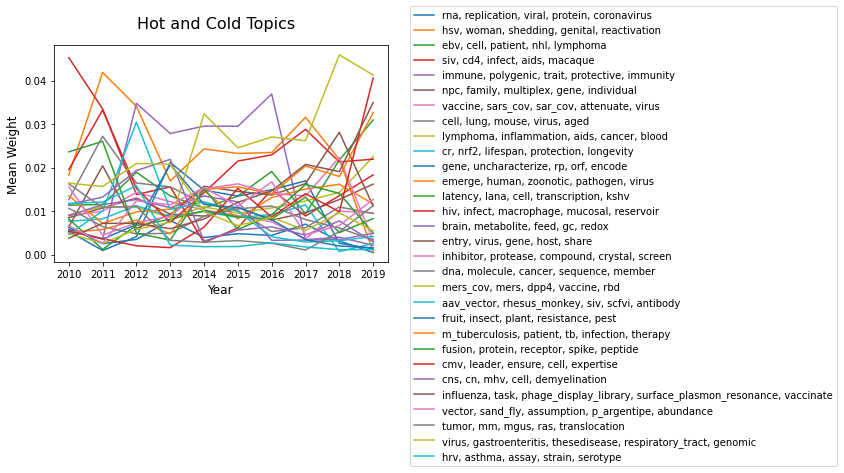

In [27]:
#Make Graphs
#leg = []
topic_results = {}
fig = plt.figure()
fig.suptitle('Hot and Cold Topics', fontsize=16)
ax = fig.add_subplot(111)

for i in range(1,num_topics+1):
    linear_fit = lm().fit(topic_wts_2010_2019["START_YEAR"].values.reshape(-1,1), topic_wts_2010_2019.iloc[:,i].values.reshape(-1,1))
    topic_results[i] = linear_fit.coef_[0][0]
    ax.plot(topic_wts_2010_2019["START_YEAR"], topic_wts_2010_2019.iloc[:,i])
    #leg.append("Topic %d"%(n+1))

plt.xticks(np.arange(topic_wts_2010_2019["START_YEAR"].min(), topic_wts_2010_2019["START_YEAR"].max()+1, 1.0))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Weight', fontsize=12)
#ax.yaxis.set_label_coords(-0.14,0.5)
plt.legend(leg,bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
plt.show()

In [28]:
class HandlerDashedLines(HandlerLineCollection):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # figure out how many lines there are
        numlines = len(orig_handle.get_segments())
        xdata, xdata_marker = self.get_xdata(legend, xdescent, ydescent,
                                             width, height, fontsize)
        leglines = []
        # divide the vertical space where the lines will go
        # into equal parts based on the number of lines
        ydata = np.full_like(xdata, height / (numlines + 1))
        # for each line, create the line at the proper location
        # and set the dash pattern
        for i in range(numlines):
            legline = Line2D(xdata, ydata * (numlines - i) - ydescent)
            self.update_prop(legline, orig_handle, legend)
            # set color, dash pattern, and linewidth to that
            # of the lines in linecollection
            try:
                color = orig_handle.get_colors()[i]
            except IndexError:
                color = orig_handle.get_colors()[0]
            try:
                dashes = orig_handle.get_dashes()[i]
            except IndexError:
                dashes = orig_handle.get_dashes()[0]
            try:
                lw = orig_handle.get_linewidths()[i]
            except IndexError:
                lw = orig_handle.get_linewidths()[0]
            if dashes[0] is not None:
                legline.set_dashes(dashes[1])
            legline.set_color(color)
            legline.set_transform(trans)
            legline.set_linewidth(lw)
            leglines.append(legline)
        return leglines


In [31]:
# {column index, slope} - ex) 1: Topic 0 because Topic 0 is column 1 in the dataframe

#topic_results

In [29]:
def sort_dict(x):
    return sorted(x.items(), key=lambda l: l[1], reverse=True)

In [30]:
sort_slopes = sort_dict(topic_results)
top_slopes = [x[0] for x in sort_slopes[:5]]
bottom_slopes = [x[0] for x in sort_slopes[-5:]]

In [31]:
sort_slopes[:5]

[(19, 0.0047571527046299565),
 (26, 0.0028005810238088897),
 (24, 0.0027324255637766145),
 (22, 0.0025685513125046147),
 (3, 0.0013326797726567034)]

In [32]:
top_slopes

[19, 26, 24, 22, 3]

In [33]:
bottom_slopes

[25, 30, 29, 2, 4]

### plot hottest and coldest on same plot

In [34]:
# for plotting hot and cold on same graph

topnbot_slopes = top_slopes + bottom_slopes

In [35]:
topnbot_slopes

[19, 26, 24, 22, 3, 25, 30, 29, 2, 4]

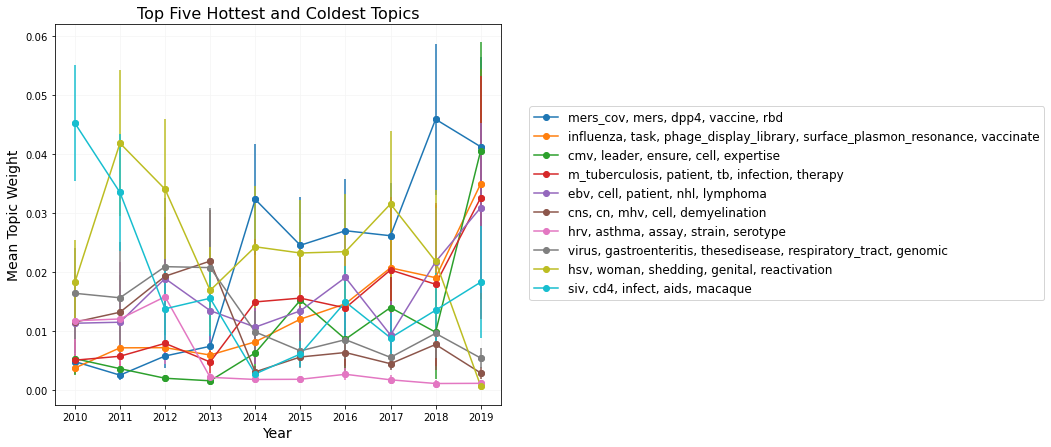

In [36]:
# Make Graphs
#leg = []
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

#color_list = ["#232d4b","#2c4f6b","#0e879c","#60999a","#d1e0bf","#d9e12b","#e6ce3a","#e6a01d","#e57200", "#ff0000"] #"#fdfdfd"]


line_return = []
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
plt.grid(True, color = "whitesmoke")
line = [[(0, 0)]]
i = 0
for n in topnbot_slopes:
    zorder = 20
    color = color_list[i] 
    #if i < 5:
    #    zorder = 10 #10
    #    color = "#D3D3D3";
    linear_fit = lm().fit(topic_wts_2010_2019["START_YEAR"].values.reshape(-1,1), topic_wts_2010_2019.iloc[:,n].values.reshape(-1,1))
    #ax.plot(topic_wts_2010_2019["START_YEAR"], (topic_wts_2010_2019["START_YEAR"]*linear_fit.coef_[0][0])+linear_fit.intercept_,linestyle = 'dashed', color = color_list[i])
    ax.plot(topic_wts_2010_2019["START_YEAR"], topic_wts_2010_2019.iloc[:,n], '-o', color = color, zorder = zorder)
    ax.errorbar(topic_wts_2010_2019["START_YEAR"], topic_wts_2010_2019.iloc[:,n], 
            yerr = np.array(topic_wts_se_2010_2019.iloc[:,n]), fmt = "o", color = color, zorder = zorder)
    #line_return.append(mcol.LineCollection(2 * line, linestyles=['solid','dashed'], colors=[color_list[i],color_list[i]]))
    line_return.append(mcol.LineCollection(line, linestyles=['solid'], colors=[color]))
    i+=1
    #leg.append("Topic %d"%(n+1))

plt.xticks(np.arange(topic_wts_2010_2019["START_YEAR"].min(), topic_wts_2010_2019["START_YEAR"].max()+1, 1.0))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Topic Weight', fontsize=14)
#plt.ylim(bottom = -0.001, top = 0.05)
plt.title('Top Five Hottest and Coldest Topics', fontsize=16)
#ax.yaxis.set_label_coords(-0.14,0.5)

# set up the proxy artist
lc = mcol.LineCollection(2 * line, linestyles=['solid','dashed'], colors=['blue','blue'])
lc2 = mcol.LineCollection(2 * line, linestyles=['solid','dashed'], colors=['orange','orange'])

# create the legend
#plt.legend(line_return, [leg[x-1] for x in topnbot_slopes], handler_map={type(line_return[0]): HandlerDashedLines()})
           #handlelength=2, bbox_to_anchor=(1.05, 0.7, 0.3, 0.2), loc='upper left')  #handleheight=2,

plt.legend([leg[x-1] for x in topnbot_slopes], bbox_to_anchor=(1.05, 0.6, 0.3, 0.2), loc='upper left', fontsize = 'large')
#plt.savefig("figures/updated_full_hot_cold_topics.png", dpi = 800, bbox_inches = "tight")
plt.show()


### Plot hottest and coldest topics on separate plots

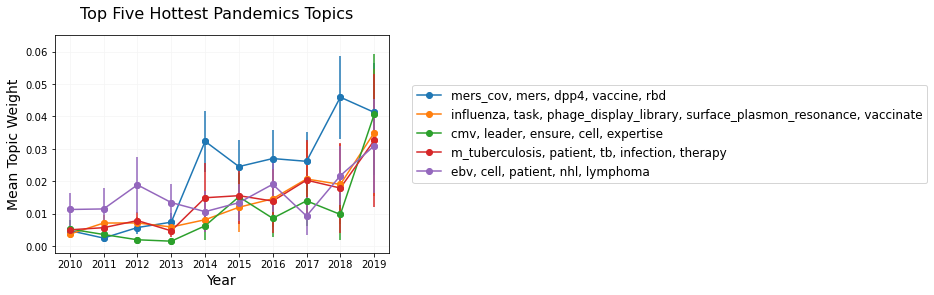

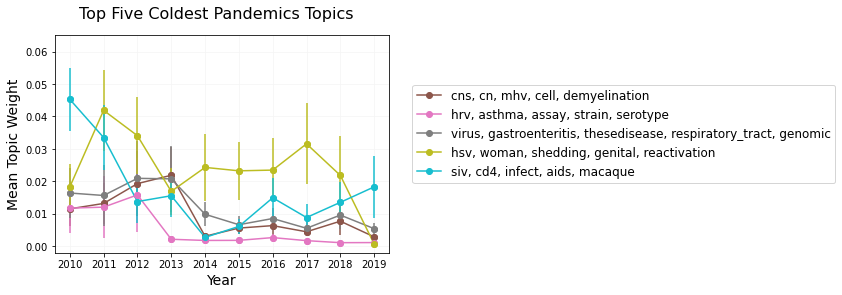

In [37]:
# Make Graphs
#leg = []
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

#color_list = ["#232d4b","#2c4f6b","#0e879c","#60999a","#d1e0bf","#d9e12b","#e6ce3a","#e6a01d","#e57200", "#ff0000"] #"#fdfdfd"]
#color_list = ["#D3D3D3","#2c4f6b","#C0C0C0","#A9A9A9","#808080","#D3D3D3","#2c4f6b","#D3D3D3","#D3D3D3", "#D3D3D3"] #"#fdfdfd"]


line_return = []
fig = plt.figure()
fig.suptitle('Top Five Hottest Pandemics Topics', fontsize=16)
ax = fig.add_subplot(111)
plt.grid(True, color = "whitesmoke")
line = [[(0, 0)]]
i = 0
for n in top_slopes:
    zorder = 10
    color = color_list[i] # "#D3D3D3"   
    if i == 0:
        zorder = 10 #20
        color = color_list[i];
    linear_fit = lm().fit(topic_wts_2010_2019["START_YEAR"].values.reshape(-1,1), topic_wts_2010_2019.iloc[:,n].values.reshape(-1,1))
    #ax.plot(topic_wts_2010_2019["START_YEAR"], (topic_wts_2010_2019["START_YEAR"]*linear_fit.coef_[0][0])+linear_fit.intercept_,linestyle = 'dashed', color = color_list[i])
    ax.plot(topic_wts_2010_2019["START_YEAR"], topic_wts_2010_2019.iloc[:,n], '-o', color = color, zorder = zorder)
    ax.errorbar(topic_wts_2010_2019["START_YEAR"], topic_wts_2010_2019.iloc[:,n], 
            yerr = np.array(topic_wts_se_2010_2019.iloc[:,n]), fmt = "o", color = color, zorder = zorder)
    #line_return.append(mcol.LineCollection(2 * line, linestyles=['solid','dashed'], colors=[color_list[i],color_list[i]]))
    line_return.append(mcol.LineCollection(line, linestyles=['solid'], colors=[color]))
    i+=1
    #leg.append("Topic %d"%(n+1))

plt.xticks(np.arange(topic_wts_2010_2019["START_YEAR"].min(), topic_wts_2010_2019["START_YEAR"].max()+1, 1.0))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Topic Weight', fontsize=14)
plt.ylim(bottom = -0.002, top = 0.065)
#ax.yaxis.set_label_coords(-0.14,0.5)

# set up the proxy artist
lc = mcol.LineCollection(2 * line, linestyles=['solid','dashed'], colors=['blue','blue'])
lc2 = mcol.LineCollection(2 * line, linestyles=['solid','dashed'], colors=['orange','orange'])
# create the legend
#plt.legend(line_return, [leg[x-1] for x in top_slopes], handler_map={type(line_return[0]): HandlerDashedLines()},
#          handlelength=2, handleheight=2,bbox_to_anchor=(1.05, 0.7, 0.3, 0.2), loc='upper left')

plt.legend([leg[x-1] for x in top_slopes], bbox_to_anchor=(1.05, 0.6, 0.3, 0.2), loc='upper left', fontsize = 'large')
#plt.savefig("figures/coronavirus_hot_topics-new.png", dpi = 800, bbox_inches = "tight")
plt.show()


#Make Graphs
#leg = []

#bottom_slopes.reverse()  # so the plot legend has the coldest listed first

line_return = []
fig = plt.figure()
fig.suptitle('Top Five Coldest Pandemics Topics', fontsize=16)
ax = fig.add_subplot(111)
plt.grid(True, color = "whitesmoke")
i = 0
for n in bottom_slopes:
    zorder = 10
    color = color_list[i+5]  #"#D3D3D3"  
    if i == 4:
        zorder = 10 #20
        color = color_list[i+5]
    linear_fit = lm().fit(topic_wts_2010_2019["START_YEAR"].values.reshape(-1,1), topic_wts_2010_2019.iloc[:,n].values.reshape(-1,1))
    #ax.plot(topic_wts_2010_2019["START_YEAR"], (topic_wts_2010_2019["START_YEAR"]*linear_fit.coef_[0][0])+linear_fit.intercept_,linestyle = 'dashed', color = color_list[i+5])
    ax.plot(topic_wts_2010_2019["START_YEAR"], topic_wts_2010_2019.iloc[:,n], '-o', color=color, zorder = zorder)
    ax.errorbar(topic_wts_2010_2019["START_YEAR"], topic_wts_2010_2019.iloc[:,n], 
            yerr = np.array(topic_wts_se_2010_2019.iloc[:,n]), fmt = "o", color=color, zorder = zorder)
    #line_return.append(mcol.LineCollection(2 * line, linestyles=['solid','dashed'], colors=[color_list[i+5],color_list[i+5]]))
    line_return.append(mcol.LineCollection(line, linestyles=['solid'], colors=[color]))
    i+=1
    #leg.append("Topic %d"%(n+1))

plt.xticks(np.arange(topic_wts_2010_2019["START_YEAR"].min(), topic_wts_2010_2019["START_YEAR"].max()+1, 1.0))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Topic Weight', fontsize=14)
plt.ylim(bottom = -0.002, top = 0.065)
#ax.yaxis.set_label_coords(-0.14,0.5)


# set up the proxy artist
lc = mcol.LineCollection(2 * line, linestyles=['solid','dashed'], colors=['blue','blue'])
lc2 = mcol.LineCollection(2 * line, linestyles=['solid','dashed'], colors=['orange','orange'])

# create the legend
#plt.legend(line_return, [leg[x-1] for x in bottom_slopes], handler_map={type(line_return[0]): HandlerDashedLines()},
#          handlelength=2, handleheight=2,bbox_to_anchor=(1.05, 0.7, 0.3, 0.2), loc='upper left')

plt.legend([leg[x-1] for x in bottom_slopes], bbox_to_anchor=(1.05, 0.6, 0.3, 0.2), loc='upper left', fontsize = 'large')
#plt.savefig("figures/coronavirus_cold_topics-new.png", dpi = 800, bbox_inches = "tight")
plt.show()


### create plot for specific topics

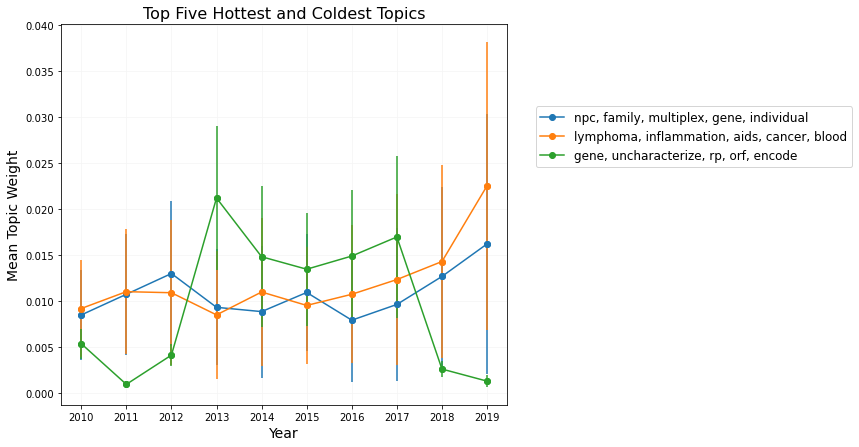

In [38]:
# Create plots for data stories in ET paper - topic numbers: 5, 8, 10 + 1 due to year being column 1

topic_idx = [6, 9, 11]

# Make Graphs
#leg = []
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

#color_list = ["#232d4b","#2c4f6b","#0e879c","#60999a","#d1e0bf","#d9e12b","#e6ce3a","#e6a01d","#e57200", "#ff0000"] #"#fdfdfd"]


line_return = []
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
plt.grid(True, color = "whitesmoke")
line = [[(0, 0)]]
i = 0
for n in topic_idx:
    zorder = 20
    color = color_list[i] 
    #if i < 5:
    #    zorder = 10 #10
    #    color = "#D3D3D3";
    linear_fit = lm().fit(topic_wts_2010_2019["START_YEAR"].values.reshape(-1,1), topic_wts_2010_2019.iloc[:,n].values.reshape(-1,1))
    #ax.plot(topic_wts_2010_2019["START_YEAR"], (topic_wts_2010_2019["START_YEAR"]*linear_fit.coef_[0][0])+linear_fit.intercept_,linestyle = 'dashed', color = color_list[i])
    ax.plot(topic_wts_2010_2019["START_YEAR"], topic_wts_2010_2019.iloc[:,n], '-o', color = color, zorder = zorder)
    ax.errorbar(topic_wts_2010_2019["START_YEAR"], topic_wts_2010_2019.iloc[:,n], 
            yerr = np.array(topic_wts_se_2010_2019.iloc[:,n]), fmt = "o", color = color, zorder = zorder)
    #line_return.append(mcol.LineCollection(2 * line, linestyles=['solid','dashed'], colors=[color_list[i],color_list[i]]))
    line_return.append(mcol.LineCollection(line, linestyles=['solid'], colors=[color]))
    i+=1
    #leg.append("Topic %d"%(n+1))

plt.xticks(np.arange(topic_wts_2010_2019["START_YEAR"].min(), topic_wts_2010_2019["START_YEAR"].max()+1, 1.0))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Topic Weight', fontsize=14)
#plt.ylim(bottom = -0.001, top = 0.05)
plt.title('Top Five Hottest and Coldest Topics', fontsize=16)
#ax.yaxis.set_label_coords(-0.14,0.5)

# set up the proxy artist
lc = mcol.LineCollection(2 * line, linestyles=['solid','dashed'], colors=['blue','blue'])
lc2 = mcol.LineCollection(2 * line, linestyles=['solid','dashed'], colors=['orange','orange'])
# create the legend
#plt.legend(line_return, [leg[x-1] for x in topic_idx], handler_map={type(line_return[0]): HandlerDashedLines()},
#          handlelength=2, handleheight=2,bbox_to_anchor=(1.05, 0.7, 0.3, 0.2), loc='upper left')

plt.legend([leg[x-1] for x in topic_idx], bbox_to_anchor=(1.05, 0.6, 0.3, 0.2), loc='upper left', fontsize = 'large')
#plt.savefig("figures/case-study.png", dpi = 800, bbox_inches = "tight")
plt.show()


## Plot for each topic in a grid

In [39]:
# get order of plots

sorted_slopes = [x[0] for x in sort_slopes]
sorted_slopes # indices from 1 to 30

# leg: indices 0-29

[19,
 26,
 24,
 22,
 3,
 16,
 9,
 12,
 6,
 17,
 14,
 13,
 27,
 11,
 18,
 1,
 7,
 10,
 21,
 28,
 5,
 15,
 23,
 20,
 8,
 25,
 30,
 29,
 2,
 4]

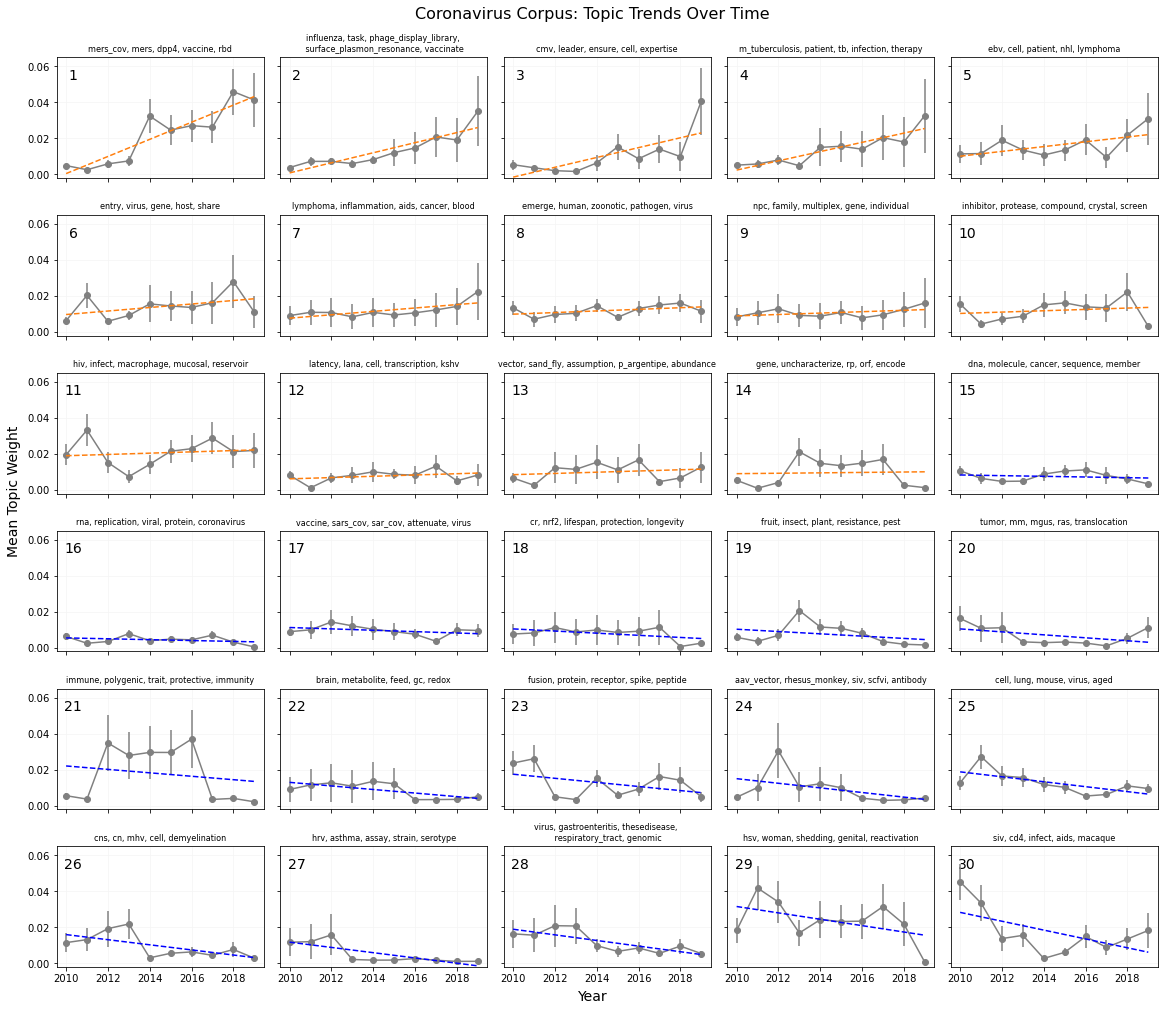

In [40]:
# set up grid
fig, ax = plt.subplots(6, 5, sharex = True, sharey = True, figsize=(16,14))
plt.ylim(bottom = -0.002, top = 0.065)

# create plot in each grid square
for count,col_idx in enumerate(sorted_slopes):
    
    col = topic_wts_2010_2019.columns[col_idx]
    
    # map count to i,j in grid
    i = count // 5
    j = count % 5
    
    linear_fit = lm().fit(
        topic_wts_2010_2019["START_YEAR"].values.reshape(-1,1), topic_wts_2010_2019[col].values.reshape(-1,1))
    
    # set color of regression line based on 'hot' or 'cold'
    if(linear_fit.coef_[0][0] > 0): # hot
        reg_line_color = '#ff7f0e'
    else: # cold
        reg_line_color = 'blue'
    
    #ax[i,j].plot(topic_wts_2010_2019["START_YEAR"], topic_wts_2010_2019[col], '-o', color = '#1f77b4')

    ax[i,j].errorbar(topic_wts_2010_2019["START_YEAR"], topic_wts_2010_2019[col], 
            yerr = np.array(topic_wts_se_2010_2019[col]), fmt = '-o', color = 'gray', zorder = 10) 
    
    ax[i,j].plot(topic_wts_2010_2019["START_YEAR"], \
        (topic_wts_2010_2019["START_YEAR"]*linear_fit.coef_[0][0])+linear_fit.intercept_, \
        linestyle = 'dashed', color = reg_line_color, zorder = 20)
    
    ax[i,j].grid(color = "whitesmoke")

    # put legend on two lines for topics 2, 28
    if count == 1:
        ax[i,j].set_title('influenza, task, phage_display_library, \n surface_plasmon_resonance, vaccinate', \
                          fontsize = 8)
    elif count == 27:
        ax[i,j].set_title('virus, gastroenteritis, thesedisease, \n respiratory_tract, genomic', fontsize = 8)
    else:
        ax[i,j].set_title(leg[col_idx-1], fontsize = 8)
    
    # add topic number to each plot
    ax[i,j].text(0.08, 0.85, str(count+1), horizontalalignment='center', verticalalignment='center', \
                 transform=ax[i,j].transAxes, fontsize = 14)
    
    
fig.suptitle('Coronavirus Corpus: Topic Trends Over Time', fontsize = 16)
fig.text(0.5, -0.002, 'Year', ha='center', va='center', fontsize = 14)
fig.text(-0.002, 0.5, 'Mean Topic Weight', ha='center', va='center', rotation='vertical', fontsize = 14)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

plt.savefig("../figures/coronavirus/topic_trends.png", dpi = 800, bbox_inches = "tight")
plt.show()

In [41]:
# get legend items for too long titles (topic 2)

leg[25]
leg[28]

'virus, gastroenteritis, thesedisease, respiratory_tract, genomic'

### Descriptive statistics on corpus

In [42]:
df["START_YEAR"].value_counts()

2008    107
2009     91
2010     89
2015     74
2011     71
2013     68
2016     63
2012     60
2014     59
2017     51
2018     45
2007     30
2019     30
2005     25
2004     18
2006     17
2001      9
1997      6
1985      5
1991      5
2002      5
1998      4
2003      4
1987      3
1981      3
1988      2
1980      2
1999      2
1975      2
1990      2
1977      1
1996      1
1979      1
1992      1
2000      1
Name: START_YEAR, dtype: int64

In [43]:
df["DEPARTMENT"].value_counts()

HHS     864
USDA     56
NSF      25
NASA      5
DOD       4
VA        3
Name: DEPARTMENT, dtype: int64

In [44]:
# filter data frame by year and repeat descriptive statistics.  Limit years to those for emerging topic analysis.

filt_df = df.copy()
filt_df["START_YEAR"] = filt_df["START_YEAR"].astype('int')

filt_df = filt_df[filt_df["START_YEAR"] > 2009]
filt_df = filt_df[filt_df["START_YEAR"] < 2020]

In [48]:
filt_df["START_YEAR"].value_counts().sort_index()

2010    89
2011    71
2012    60
2013    68
2014    59
2015    74
2016    63
2017    51
2018    45
2019    30
Name: START_YEAR, dtype: int64

In [46]:
filt_df["DEPARTMENT"].value_counts()

HHS     544
USDA     34
NSF      21
DOD       4
NASA      4
VA        3
Name: DEPARTMENT, dtype: int64

In [47]:
filt_df.pivot_table(index=['DEPARTMENT','START_YEAR'], aggfunc='size')

DEPARTMENT  START_YEAR
DOD         2015           1
            2018           1
            2019           2
HHS         2010          80
            2011          69
            2012          55
            2013          55
            2014          51
            2015          63
            2016          52
            2017          49
            2018          42
            2019          28
NASA        2010           1
            2015           2
            2016           1
NSF         2010           2
            2012           3
            2013           3
            2014           2
            2015           2
            2016           6
            2017           1
            2018           2
USDA        2010           5
            2011           1
            2012           2
            2013           9
            2014           6
            2015           6
            2016           4
            2017           1
VA          2010           1
            2011    